# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [106]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [21]:
print df_raw.isnull().T.any().T.sum(),"row(s) have at least 1 null value"
print len(df_raw) - df_raw.isnull().T.any().T.sum(),"row(s) have complete data"

3 row(s) have at least 1 null value
397 row(s) have complete data


Answer: 400 observations, of which 397 have no null values

#### Question 2. Create a summary table

In [ ]:
#function

In [22]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Standard Deviation is measured in the units of the variable measured.  As the grade range on the GRE is on a base of 800, whereby the GPA is on a base of 4, the standard deviation is (highly likely to be) higher for GRE than it is for GOA

#### Question 4. Drop data points with missing data


In [23]:
df_complete = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [25]:
df_complete.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: a count() function demonstrates that all 397 lines have complete data; compares favorably to Q1 sub-answer

#### Question 6. Create box plots for GRE and GPA

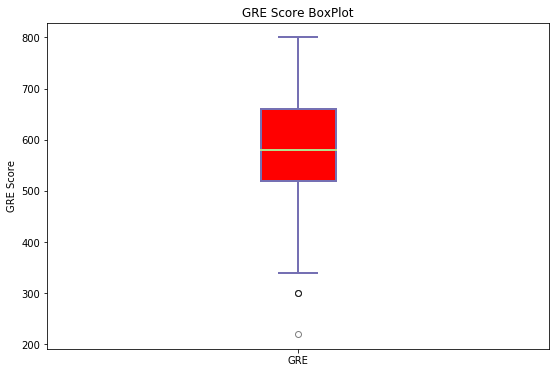

In [115]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_complete["gre"], patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='#7570b3', linewidth=2)
    # change fill color
    box.set(facecolor = 'red')
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_xticklabels(['GRE'])
ax.set_ylabel('GRE Score')
ax.set_title("GRE Score BoxPlot")
fig.show()

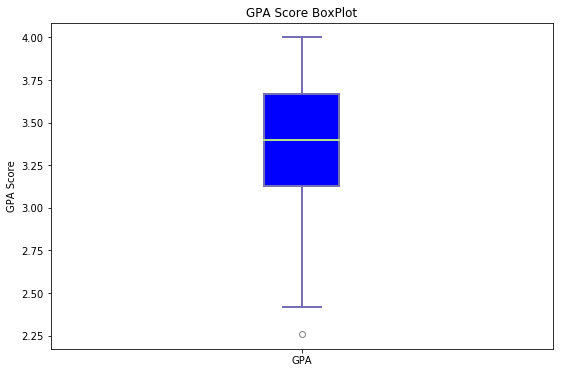

In [116]:
fig2 = plt.figure(1, figsize=(9, 6))
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot(df_complete["gpa"], patch_artist=True)
for box in bp2['boxes']:
    # change outline color
    box.set(color='#7570b3', linewidth=2)
    # change fill color
    box.set(facecolor = 'blue')
for whisker in bp2['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp2['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp2['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in bp2['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax2.set_xticklabels(['GPA'])
ax2.set_ylabel('GPA Score')
ax2.set_title("GPA Score BoxPlot")
fig2.show()

#### Question 7. What do this plots show?

Answer: Distributions appear to be similar (scale aside), with the GPA skewed slightly higher than GRE

#### Question 8. Describe each distribution 

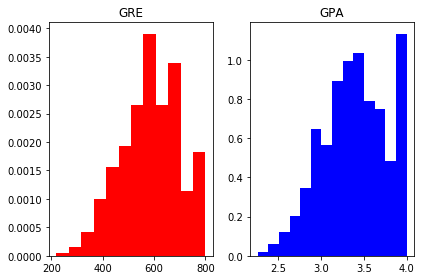

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

colors = ['red']
ax0.hist(df_complete["gre"], 12, normed=1, histtype='bar', color='red')
ax0.set_title('GRE')

ax1.hist(df_complete["gpa"], 14, normed=1, histtype='bar', color='blue')
ax1.set_title('GPA')

fig.tight_layout()
plt.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: GRE is closer than GPA for normal distribution; however, both have a higher-than-expected number of data points at/close to perfect (800 for GRE, 4.0 for GPA)

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No

#### Question 11. Which of our variables are potentially colinear? 

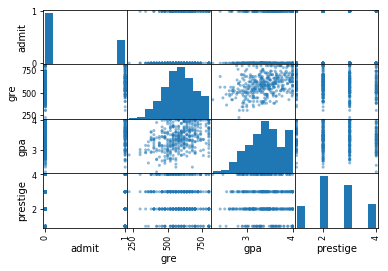

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [119]:
# create a correlation matrix for the data
from pandas.plotting import scatter_matrix
scatter_matrix(df_complete)
plt.show()
df_complete.corr()

#### Question 12. What did you find?

Answer: There's a degree of correlation between GRE and GPA; however, it's in fact lower than expected

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would evaluate the probability of admissions into grad school compared to the prestige of the undergrad institution, and ascertain if there is any correlation.  Next would be to conduct a regression to validate the hypothesis

In [176]:
admit_prestige = df_complete.groupby(["prestige","admit"]).size().unstack()

def f(row):
    return row["1"] / (row["0"] + row["1"])

admit_prestige.columns = ["0", "1"]
admit_prestige["p_admit"] = admit_prestige.apply(f, axis=1)
admit_prestige

,0,1,p_admit
prestige,,,
1.0,28,33,0.540984
2.0,95,53,0.358108
3.0,93,28,0.231405
4.0,55,12,0.179104


#### Question 14. What is your hypothesis? 

Answer: A more prestigious undergrad institution will improve probability of admittance to a graduate program.  However, we already know that it's a loose correlation of 0.24 toward prestigious institutions, so not very strong. Using a KNN model (with n = 8 neighbors), we can explain ~68% of the admittance criteria from undergrad prestige, GRE, and GPA

In [190]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [233]:
y = df_complete["admit"]
X = df_complete.drop("admit", axis = 1)

outputs = [[]]

for i in range(1,1000):
    line = []
    for n in range(1,10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)

        knn = KNeighborsClassifier(n_neighbors=n)

        knn.fit(X_train, y_train)
        line.append(knn.score(X_test, y_test))
    outputs.append(line)

"""rd_r2_train = knn.score(X_train, y_train)
rd_r2_test = knn.score(X_test, y_test)

print "R2 on train: {}".format(rd_r2_train)
print "R2 on test: {}".format(rd_r2_test)

print knn.get_params"""
#Coefficients = pd.DataFrame(zip(X_train, knn.coef_), columns=("feature", "coef"))
#Coefficients.sort_values("coef", ascending=False)

'rd_r2_train = knn.score(X_train, y_train)\nrd_r2_test = knn.score(X_test, y_test)\n\nprint "R2 on train: {}".format(rd_r2_train)\nprint "R2 on test: {}".format(rd_r2_test)\n\nprint knn.get_params'

In [274]:
df = pd.DataFrame(outputs, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9'])
df = df.dropna()

In [338]:
df.head()

,1,2,3,4,5,6,7,8,9
1,0.590909,0.689394,0.643939,0.674242,0.636364,0.674242,0.643939,0.659091,0.636364
2,0.606061,0.666667,0.651515,0.696970,0.689394,0.681818,0.666667,0.666667,0.681818
3,0.636364,0.704545,0.719697,0.757576,0.681818,0.696970,0.681818,0.689394,0.651515
4,0.636364,0.666667,0.674242,0.651515,0.643939,0.674242,0.674242,0.666667,0.636364
5,0.643939,0.659091,0.636364,0.636364,0.643939,0.659091,0.659091,0.696970,0.666667


In [339]:
df.describe()

,1,2,3,4,5,6,7,8,9
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.609640,0.656952,0.639094,0.670898,0.650825,0.673689,0.661047,0.676040,0.666712
std,0.036288,0.033916,0.035668,0.033370,0.034346,0.033600,0.034688,0.034314,0.034665
min,0.477273,0.553030,0.522727,0.575758,0.537879,0.560606,0.545455,0.568182,0.553030
25%,0.583333,0.636364,0.613636,0.647727,0.628788,0.651515,0.636364,0.651515,0.643939
50%,0.613636,0.659091,0.643939,0.674242,0.651515,0.674242,0.659091,0.674242,0.666667
75%,0.636364,0.681818,0.666667,0.696970,0.674242,0.696970,0.681818,0.696970,0.689394
max,0.719697,0.757576,0.742424,0.772727,0.750000,0.772727,0.757576,0.780303,0.772727


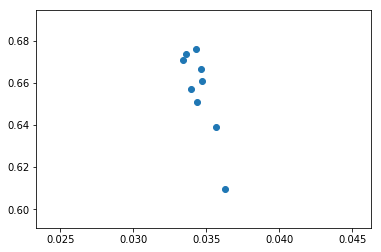

In [337]:
q = df.describe()
means = q.loc[["mean"]]
means_vals = means.values
means_vals2 = means.values[0]
stdevs = q.loc[["std"]]
stdevs_vals = stdevs.values
stdevs_vals2 = stdevs.values[0]

plt.scatter(stdevs_vals2, means_vals2)


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data